Representacion de datos con tensores

In [0]:
import torch
import numpy as np
import pandas as pd

# Importa el metodo de 'neuronal network'
import torch.nn as nn
# Metodo para calculo de gradientes
import torch.optim as optim
# Clase para calculo de figuras
import matplotlib.pyplot as plt


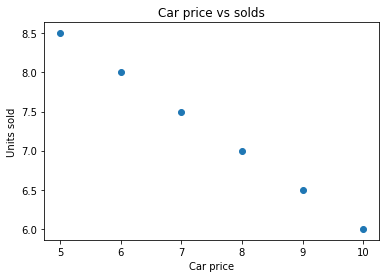

In [34]:
car_prices = [5,6,7,8,9,10]
units_sold = [8.5,8,7.5,7,6.5,6]
# plotear data
# plt.scatter(x,y)
plt.scatter( car_prices, units_sold)
# Add title
plt.title("Car price vs solds")
# Adding labels
plt.xlabel("Car price")
plt.ylabel("Units sold")
plt.show()

In [13]:
# Making the data into a vector with numpy
# .respahe(-1,1) = reordena la dimension "n" a criterio de numpy(-1), con maxima dimension "m" de 1
# .respahe(1,-1) = reordena la dimension "n" a 1, con dimension "m" que numpy considere la mejor
prices_array = np.array(car_prices).reshape(-1,1)
units_sold_array = np.array(units_sold).reshape(-1,1)
# Making it a tensor
# Needs a gradientes because is data train
# requires__grad__(True/False): enable or disable gradient
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
# Doesn't requiere a gradiente because is what we are going to explain
units = torch.from_numpy(units_sold_array).float()
prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

In [35]:
prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

Uso de ".reshape()"

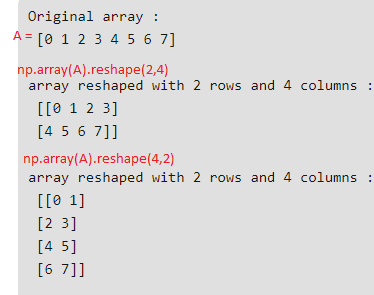

tensor(0.0181, grad_fn=<MseLossBackward>)


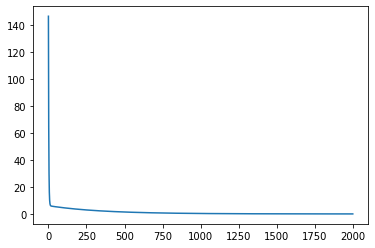

In [36]:
# regresion lineal, (1,1) porque la entrada es un valor y arroja 1 solo valor
model = nn.Linear(1,1)
# La perdida sera determinada por la Media del cuadrado de los errores MSELoss
loss_function = nn.MSELoss()
# SGD= stocastic gradient descent
#.parameter: cuales seran los pesos, sera sacados de model
# por eso model.parameter()
# lr : learning rate, busqueda de minimizar el loss, por ahora valor arbitrario
optimizer = optim.SGD(model.parameters(), lr=0.015)

# Training loop
# Vamos a ver como evoluciona la perdida a medida que se realizan las iteraciones
losses = []
iterations = 2000
for i in range(iterations):
  # Usamos el modelo lineal con la data de los precios
  pred = model(prices)
  # La perdida sera la prediccion hecha arriba con la variable real
  loss = loss_function(pred, units)
  # Vamos agregando cada perdida de cada iteracion a la lista para grafica
  losses.append(loss.data)

  # Reiniciamos el gradiente para cada iteracion
  # Puesto que python acumula el valor de la gradiente para cada iteracion
  optimizer.zero_grad()
  # Regla de la cadena para los erroes
  loss.backward()
  # En base a los gradientes que se calcularon nos movemos
  # en la direccion mas corta(minima)
  optimizer.step()

print(loss)
plt.plot(range(iterations), losses)

In [37]:
x = torch.Tensor([[5]])
p = model(x)
p

tensor([[8.2785]], grad_fn=<AddmmBackward>)

In [27]:
loss

tensor(0.0146, grad_fn=<MseLossBackward>)